<a href="https://colab.research.google.com/github/Renan906/Exercicio2-DataScience/blob/main/Adults_Income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import graphviz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz

In [13]:
df_income_train = pd.read_csv("adult_data.csv", header=None, sep=',')
df_income_test = pd.read_csv("adult_test.csv", header=None, sep = ',')

df_income_train.columns = ["Age", "Workclass", "FnlWgt", "Education", "Education_Num", "Marital_Status", "Occupation", "Relationship", \
                           "Race", "Sex", "Capital_Gain", "Capital_Loss", "Hours_per_Week", "Country", "Earns"]
df_income_test.columns = ["Age", "Workclass", "FnlWgt", "Education", "Education_Num", "Marital_Status", "Occupation", "Relationship", \
                          "Race", "Sex", "Capital_Gain", "Capital_Loss", "Hours_per_Week", "Country", "Earns"]

df_income_train["Earns"] = df_income_train["Earns"].str.strip()
df_income_test["Earns"]  = df_income_test["Earns"].str.strip()

df_income_train.head(10)

,Age,Workclass,FnlWgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_Week,Country,Earns
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [10]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Carregue os dados
df_income_train = pd.read_csv("adult_data.csv", header=None, sep=',')
df_income_test = pd.read_csv("adult_test.csv", header=None, sep=',')

# Defina os nomes das colunas
df_income_train.columns = ["Age", "Workclass", "FnlWgt", "Education", "Education_Num", "Marital_Status", "Occupation", "Relationship", \
                           "Race", "Sex", "Capital_Gain", "Capital_Loss", "Hours_per_Week", "Country", "Earns"]
df_income_test.columns = ["Age", "Workclass", "FnlWgt", "Education", "Education_Num", "Marital_Status", "Occupation", "Relationship", \
                          "Race", "Sex", "Capital_Gain", "Capital_Loss", "Hours_per_Week", "Country", "Earns"]

# Remova espaços em branco dos valores da coluna "Earns"
df_income_train["Earns"] = df_income_train["Earns"].str.strip()
df_income_test["Earns"] = df_income_test["Earns"].str.strip()

# Mapeie as classes da variável alvo para '>50K' e '<=50K'
df_income_train["Earns"] = df_income_train["Earns"].map({'<=50K': '<=50K', '>50K': '>50K'})
df_income_test["Earns"] = df_income_test["Earns"].map({'<=50K.': '<=50K', '>50K.': '>50K'})

# Codifique as variáveis categóricas
label_encoder = LabelEncoder()
categorical_columns = df_income_train.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df_income_train[col] = label_encoder.fit_transform(df_income_train[col])
    df_income_test[col] = label_encoder.transform(df_income_test[col])


Acurácia da Árvore de Decisão (Validação Cruzada): 0.8123213166274266


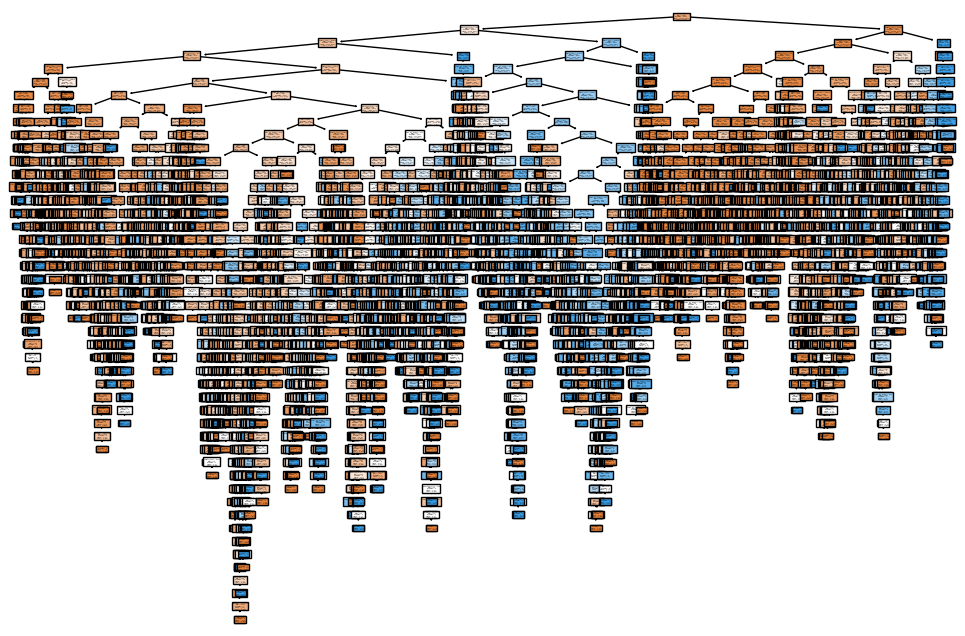

In [11]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Divida os dados em features (X) e target (y)
X_train = df_income_train.drop("Earns", axis=1)
y_train = df_income_train["Earns"]

# Crie um modelo de Árvore de Decisão
dt_model = DecisionTreeClassifier(random_state=42)

# Realize a validação cruzada em 10 partes
kf = KFold(n_splits=10, shuffle=True, random_state=42)
dt_scores = cross_val_score(dt_model, X_train, y_train, cv=kf, scoring="accuracy")
print("Acurácia da Árvore de Decisão (Validação Cruzada):", np.mean(dt_scores))

# Treine a Árvore de Decisão final
dt_model.fit(X_train, y_train)

# Exiba a árvore de decisão gerada
plt.figure(figsize=(12, 8))
from sklearn.tree import plot_tree
plot_tree(dt_model, filled=True, feature_names=X_train.columns, class_names=["<=50K", ">50K"])
plt.show()


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Crie um modelo de Floresta Aleatória
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Avalie o modelo usando validação cruzada
rf_scores = cross_val_score(rf_model, X_train, y_train, cv=kf, scoring="accuracy")
print("Acurácia da Floresta Aleatória (Validação Cruzada):", np.mean(rf_scores))

# Treine a Floresta Aleatória final
rf_model.fit(X_train, y_train)

# Avalie o modelo de Floresta Aleatória no conjunto de teste
X_test = df_income_test.drop("Earns", axis=1)
y_test = df_income_test["Earns"]
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Acurácia da Floresta Aleatória (Teste):", rf_accuracy)


Acurácia da Floresta Aleatória (Validação Cruzada): 0.8561467212181059
Acurácia da Floresta Aleatória (Teste): 0.8534488053559364
